<a href="https://colab.research.google.com/github/Justduzi/Multi_class_Neural_Network/blob/main/Neural_Network_Multi_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Building a neural network to classify images of different clothing items

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#check shape
train_images[0].shape, train_labels[0].shape

((28, 28), ())

In [4]:
class_names = ["T-shirt/Top","Trouser", "Pullover"," Dress", "Coat", "sandal","Shirt","Sneaker", "Bag","Ankle Boot"]

Four Multi-class we are  using a similar architechture tobinary classification buy itha few tweaks
* Input shape = 28 x 28
* Output shape= 10(one per class of clothing)
* Loss function CategorialCrossentropy() for one hot enocoded labels = tf.one_hot(y_train , depth=size)
* Loss Function SparseCategoricalCrossentropy for integers
* Output Layer activation = Softmax
* data needs to be flattened= tf.keras.layers.Flatten(input_shape=())


In [5]:
#Building Multiclass Neural Network

#create random seed
tf.random.set_seed(42)

#Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])
#Compile model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit
non_norm_history = model_1.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels) )

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

Neural Networks prefer data to be scaled (or normalised) making the between 0 & 1

In [6]:
train_images.min(), train_images.max()

(0, 255)

In [7]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [8]:
#build NN with normalised data

#Create random seed
tf.random.set_seed(42)

#Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compile model
model_2.compile(loss="SparseCategoricalCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

#fit
history_norm = model_2.fit(train_images_norm, train_labels,epochs=10, validation_data=(test_images_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [9]:
import pandas as pd


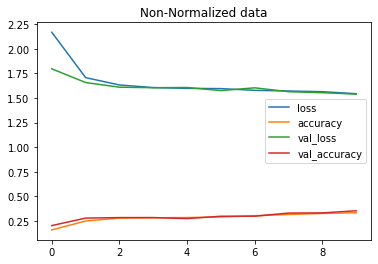

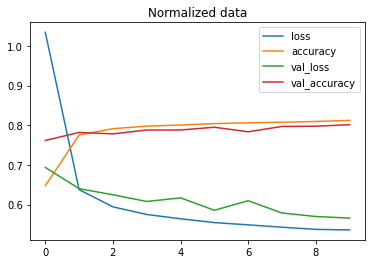

In [10]:
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized data")
pd.DataFrame(history_norm.history).plot(title="Normalized data")

When comparing results Normalised data produces better results.

In [11]:
#Find ideal learning rate


#Create random seed
tf.random.set_seed(42)

#Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compile model
model_3.compile(loss="SparseCategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e3 * 10 **(epoch/20))

#fit
lr_history = model_3.fit(train_images_norm, train_labels,epochs=40, validation_data=(test_images_norm,test_labels),callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1318822.0000 - accuracy: 0.1007 - val_loss: 477.0197 - val_accuracy: 0.1000 - lr: 1000.0000
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 698.5165 - accuracy: 0.0985 - val_loss: 486.3177 - val_accuracy: 0.1000 - lr: 1122.0184
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 802.3875 - accuracy: 0.0977 - val_loss: 818.8620 - val_accuracy: 0.1000 - lr: 1258.9254
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 867.4572 - accuracy: 0.0999 - val_loss: 777.7833 - val_accuracy: 0.1000 - lr: 1412.5376
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 973.1163 - accuracy: 0.1023 - val_loss: 934.6040 - val_accuracy: 0.1000 - lr: 1584.8932
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1096.5759 - accuracy: 0.0985 - val_loss: 953.8010 - val_accuracy: 0.1000 - lr: 1778.2794
Epoch 7/40


Text(0.5, 1.0, 'Finding the ideal learning rate')

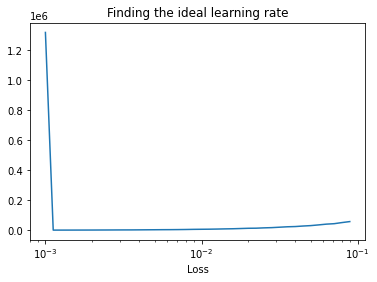

In [12]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_history.history["loss"])
plt.xlabel("Loss")
plt.title("Finding the ideal learning rate")


In [13]:
#Set random seed 
tf.random.set_seed(42)

#create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
#Compile model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#fit
history4 = model_4.fit(train_images_norm, train_labels,epochs=25, validation_data=(test_images_norm,test_labels))

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [14]:
y_probs = model_4.predict(test_images_norm)


In [15]:
#Convert all predicitions probabilities to integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10], test_labels[:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

In [16]:
#how to create confussion metrics
from sklearn.metrics import confusion_matrix
#make predictions

In [18]:
#Create confusion matrix
class_names[y_preds[0]]
cf_matrix = confusion_matrix(test_labels, y_preds)
cf_matrix

array([[795,   8,  24,  81,   2,   3,  76,   0,  11,   0],
       [  2, 941,   5,  36,   5,   0,  11,   0,   0,   0],
       [ 32,   1, 695,  14, 127,   0, 115,   0,  16,   0],
       [ 55,  13,  10, 838,  24,   0,  42,   1,  17,   0],
       [  1,   1, 161,  54, 637,   0, 133,   0,  12,   1],
       [  0,   0,   0,   0,   0, 926,   0,  45,   5,  24],
       [193,   4, 174,  54,  87,   2, 471,   0,  15,   0],
       [  0,   0,   0,   0,   0,  45,   0, 915,   0,  40],
       [  8,   1,  37,  16,   4,  12,   8,   5, 908,   1],
       [  0,   0,   1,   0,   1,  32,   1,  42,   1, 922]])

In [42]:
np.sum(cf_matrix, axis=1)

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

In [45]:
#drip up the confusion matrix
import seaborn as sns

def plot_confusion_matrix(cf_matrix):
  ax = sns.heatmap((cf_matrix/np.sum(cf_matrix, axis=0)), annot=True, cmap='Blues', fmt='.2%')

  ax.set_title('Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(class_names)
  ax.yaxis.set_ticklabels(class_names)

  ## Display the visualization of the Confusion Matrix.
  
  plt.show()

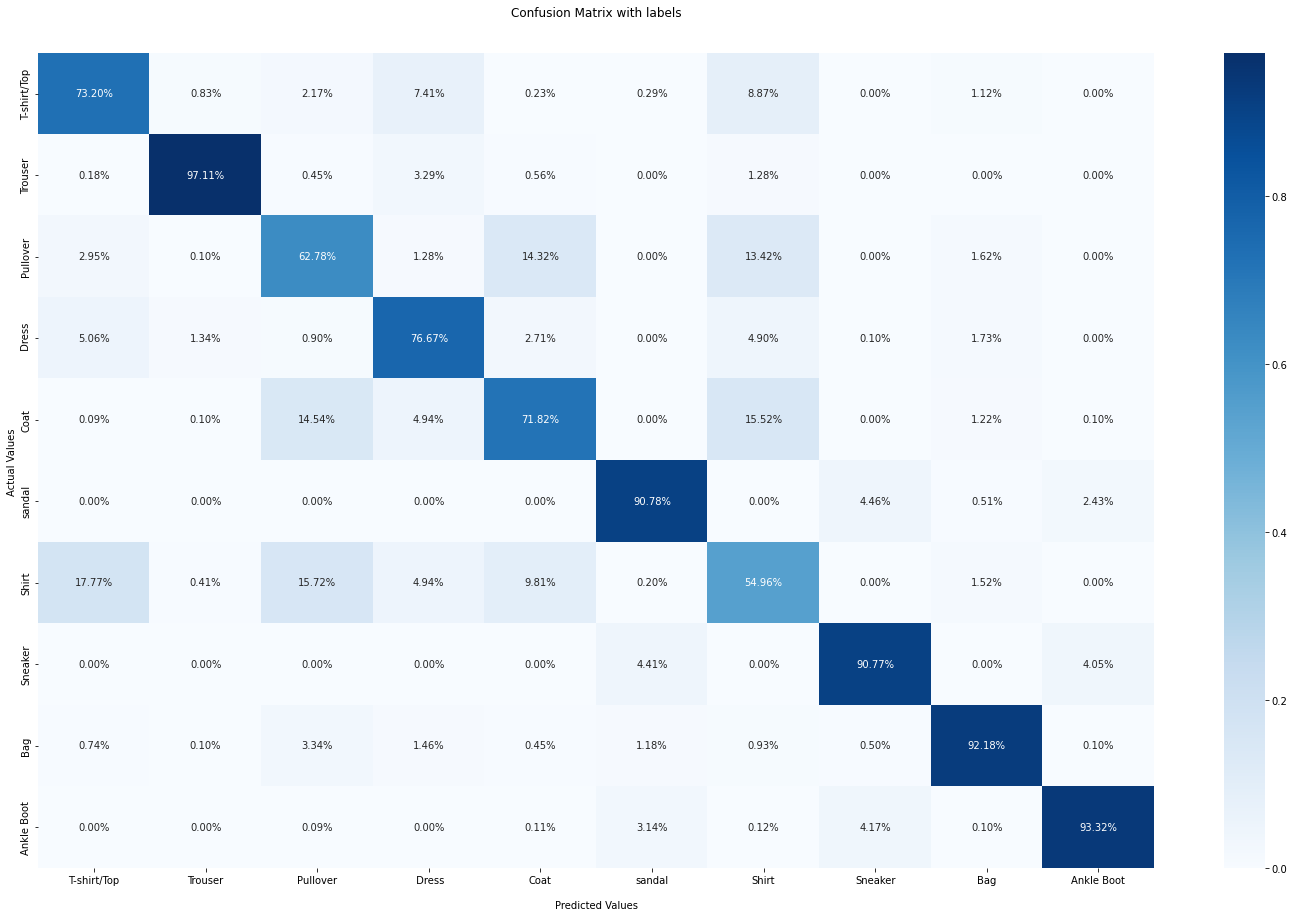

In [46]:
plt.figure(figsize=(25,15))
plot_confusion_matrix(cf_matrix)


What patterns is our model Learning